# PROG8431-25S-Sec1-Data Analysis Mathematics, Algorithms and Modeling - Group Project 3

1. Erica Holden, 5490685
2. Yu-Chen Chou (Tracy), 9006160
3. Reham Omar Hussein Abuarqoub, 9062922

## Introduction

We are exploring diabetes data through blood glucose monitoring readings found using FreeStyle Libre 2 CGMs, and Fitbit Ionic smartwatches over at least 14 days, including insulin dose administration, meal ingestion counted in carbohydrate grams, steps, calories burned, heart rate, and sleep quality and quantity assessment.

## Define the Null Hypothesis and Alternative Hypothesis
Null Hypothesis (H0): Increased carb input will generally increase blood glucose readings.

Alternative Hypothesis (H1): Increased carb input will generally not increase blood glucose readings or there is no significant correlation between the two

In [1]:
# Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

class DiabetesAnalyzer:
    def __init__(self, data):
        self.data = data
    
    def plot_glucose_by_carb_input(self):
        fig, ax1 = plt.subplots(figsize=(12, 6))

        # Plot glucose on left y-axis
        ax1.set_xlabel('Time')
        ax1.set_ylabel('Glucose (mg/dL)', color='tab:red')
        ax1.plot(self.data['time'], self.data['glucose'], color='tab:red', label='Glucose')
        ax1.tick_params(axis='y', labelcolor='tab:red')

        # Create second y-axis for carb input
        ax2 = ax1.twinx()
        ax2.set_ylabel('Carb Input', color='tab:blue')
        ax2.plot(self.data['time'], self.data['carb_input'], color='tab:blue', linestyle='dashed', label='Carb Input')
        ax2.tick_params(axis='y', labelcolor='tab:blue')

        # Merge legends
        lines_1, labels_1 = ax1.get_legend_handles_labels()
        lines_2, labels_2 = ax2.get_legend_handles_labels()
        ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')

        # Improve readability
        plt.title('Glucose and Carb Input Over Time')
        fig.tight_layout()
        plt.grid(True)
        plt.show()
    
    def plot_glucose_by_moving_average(self, window=3):
        # Calculate moving average
        # Here set the moving average window is 3, which can be adjusted according to needs
        self.data['glucose_ma'] = self.data['glucose'].rolling(window=window).mean() 

        fig, ax1 = plt.subplots(figsize=(12, 6))

        # Plot the original blood glucose value and the moving average on left y-axis
        ax1.plot(self.data['time'], self.data['glucose'], color='tab:red', alpha=0.4, label='Glucose')
        ax1.plot(self.data['time'], self.data['glucose_ma'], color='tab:green', linewidth=2, label=f'Glucose MA (window={window})')
        ax1.set_xlabel('Time')
        ax1.set_ylabel('Glucose (mg/dL)', color='tab:red')
        ax1.tick_params(axis='y', labelcolor='tab:red')
        
        # Plot carbohydrate intake on a second y-axis (right side)
        ax2 = ax1.twinx()
        ax2.plot(self.data['time'], self.data['carb_input'], color='tab:blue', linestyle='dashed', label='Carb Input')
        ax2.set_ylabel('Carb Input (g)', color='tab:blue')
        ax2.tick_params(axis='y', labelcolor='tab:blue')

        # Merge legends
        lines_1, labels_1 = ax1.get_legend_handles_labels()
        lines_2, labels_2 = ax2.get_legend_handles_labels()
        ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')

        # Improve readability
        plt.title('Blood Glucose, Moving Average, and Carb Input Over Time')
        fig.tight_layout()
        fig.autofmt_xdate()
        plt.grid(True)
        plt.show()


    def deseasonalize_glucose_by_carb_input(self, period=24):
        # Ensure that time is indexed and is of datetime type
        df = self.data.copy()
        df = df.sort_values('time')
        df.set_index('time', inplace=True)

        # Perform seasonal decomposition
        # Here set the period is 24, which can be adjusted according to needs
        decomposition = seasonal_decompose(df['glucose'], model='additive', period=period)
        df['glucose_deseasonalized'] = df['glucose'] - decomposition.seasonal

        # Plot the decomposition results
        decomposition.plot()
        plt.suptitle('Seasonal Decomposition of Blood Glucose')
        plt.show()

        # Plot deseasonalized blood glucose and Carb Input
        fig, ax1 = plt.subplots(figsize=(12, 6))
        
        ax1.plot(df.index, df['glucose'], color='tab:red', alpha=0.4, label='Glucose')
        ax1.plot(df.index, df['glucose_deseasonalized'], color='tab:purple', label='Deseasonalized Glucose')
        ax1.set_xlabel('Time')
        ax1.set_ylabel('Deseasonalized Glucose (mg/dL)', color='tab:purple')
        ax1.tick_params(axis='y', labelcolor='tab:purple')

        # The second y-axis draws Carb Input
        ax2 = ax1.twinx()
        ax2.plot(df.index, df['carb_input'], color='tab:blue', linestyle='dashed', label='Carb Input')
        ax2.set_ylabel('Carb Input (g)', color='tab:blue')
        ax2.tick_params(axis='y', labelcolor='tab:blue')

        # Merge legends
        lines_1, labels_1 = ax1.get_legend_handles_labels()
        lines_2, labels_2 = ax2.get_legend_handles_labels()
        ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')

        plt.title('Deseasonalized Blood Glucose and Carb Input Over Time')
        fig.tight_layout()
        fig.autofmt_xdate()
        plt.grid(True)
        plt.show()

        # Save deseasonalized data back to main data table
        #self.data['glucose_deseasonalized'] = df['glucose_deseasonalized'].values

## Identify a pattern or a trend in the time series.

Check missing values in each column:
time                      0
glucose                   0
calories                  0
heart_rate                0
steps                     0
basal_rate                0
bolus_volume_delivered    0
carb_input                0
dtype: int64


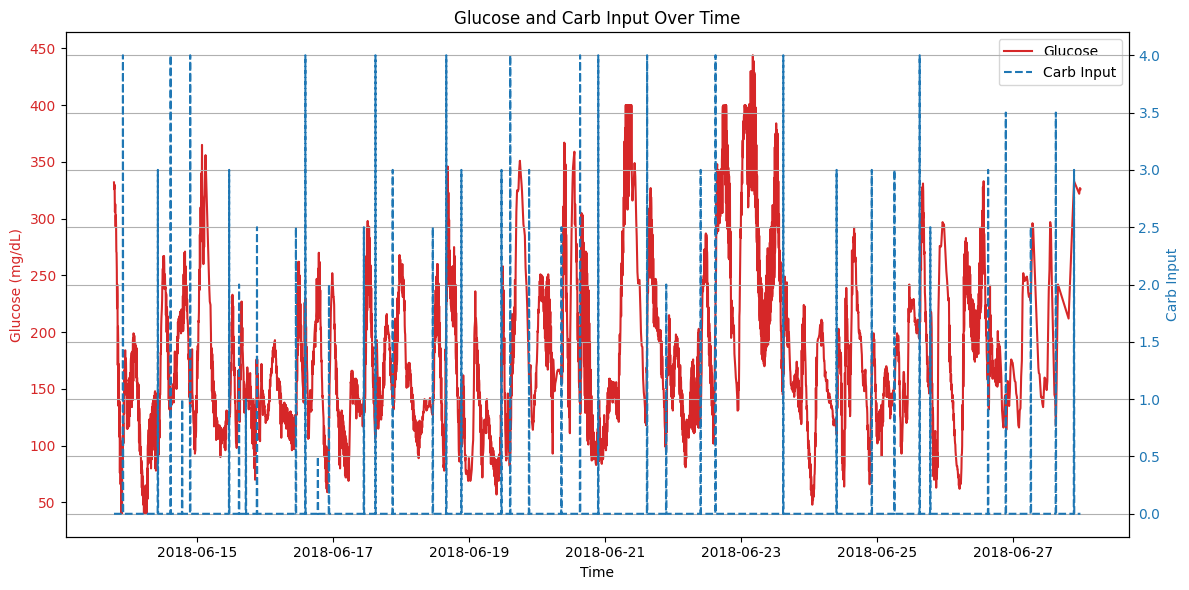

In [2]:
# Load the dataset
df = pd.read_csv('./data/HUPA0001P.csv', sep=';')

# Check for massing values
print("Check missing values in each column:")
print(df.isnull().sum())

# Force conversion of time column to datetime
df['time'] = pd.to_datetime(df['time'], errors='coerce')

# Diabetes Analyzer
analyzer = DiabetesAnalyzer(df)

# Plot Line chart of glucose and carb input
analyzer.plot_glucose_by_carb_input()


From the line chart of Glucose and Carb Input Over Time, we observe:
- There is a clear correlation between blood sugar values ​​and carb intake: after each carb_input spike, blood sugar usually fluctuates upward.
- No long-term trend, only shows short-term periodicity related to meals.
- Abnormally high blood sugar values ​​are of particular concern, and further analysis of diet, exercise, and insulin doses during this period is required.

### Summary
There is no obvious long-term trend in the time series data of blood glucose and carbohydrate intake, but in the short term, blood glucose values ​​often fluctuate violently after carbohydrate intake (meals), showing short-term periodicity. Abnormally high blood glucose values (> 350 mg/dL) ​​appear at some time points, which are highly correlated with the peak of carbohydrate intake. It is required to further analyze the daily routine and treatment records during abnormal periods.

## Calculate and plot the Moving Averages from the time series.
Our dataset is a short-term dataset. We observe the real-time fluctuations and short-term changes; thus, we set the moving average window to 3.

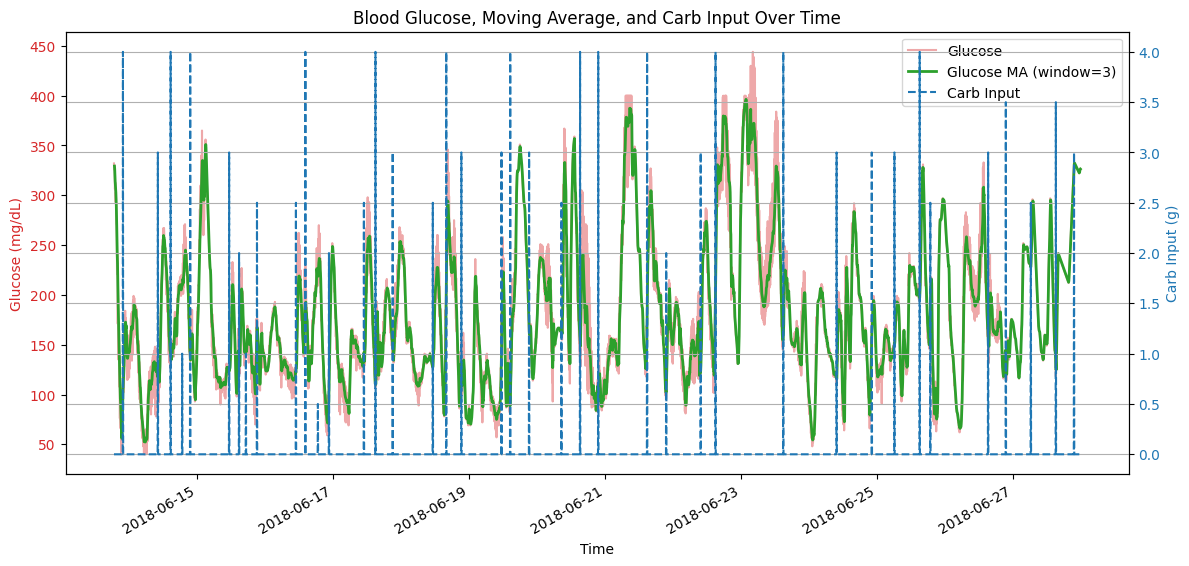

In [3]:
# Diabetes Analyzer
analyzer = DiabetesAnalyzer(df)

# Plot raw blood glucose vs. moving average (Set the moving average window is 3)
analyzer.plot_glucose_by_moving_average(window=3)

### Summary
According to the line chart of Blood Glucose, Moving Average, and Carb Input Over Time, the blood glucose time series data is additive time series data, because its seasonal fluctuations(post-meal blood glucose fluctuations) of amplitude are roughly fixed. It does not change significantly with the overall level.

## Deseasonalization of time series data
We use the seasonal_decompose method of statsmodels to decompose the blood glucose time series data into three parts: trend, seasonality, and residual, and remove the seasonal component to obtain deseasonalized blood glucose data, which is convenient for observing long-term trends and anomalies.

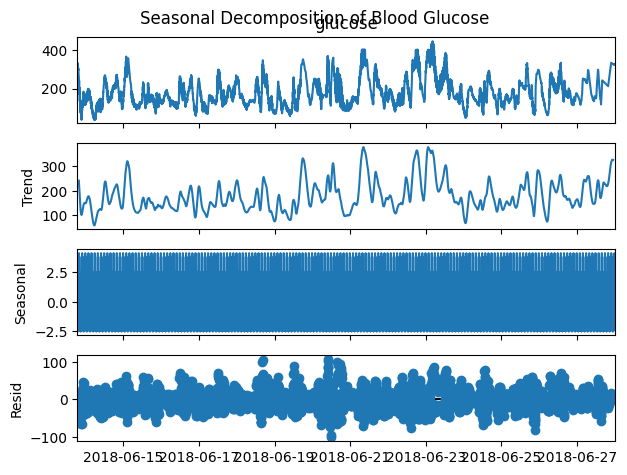

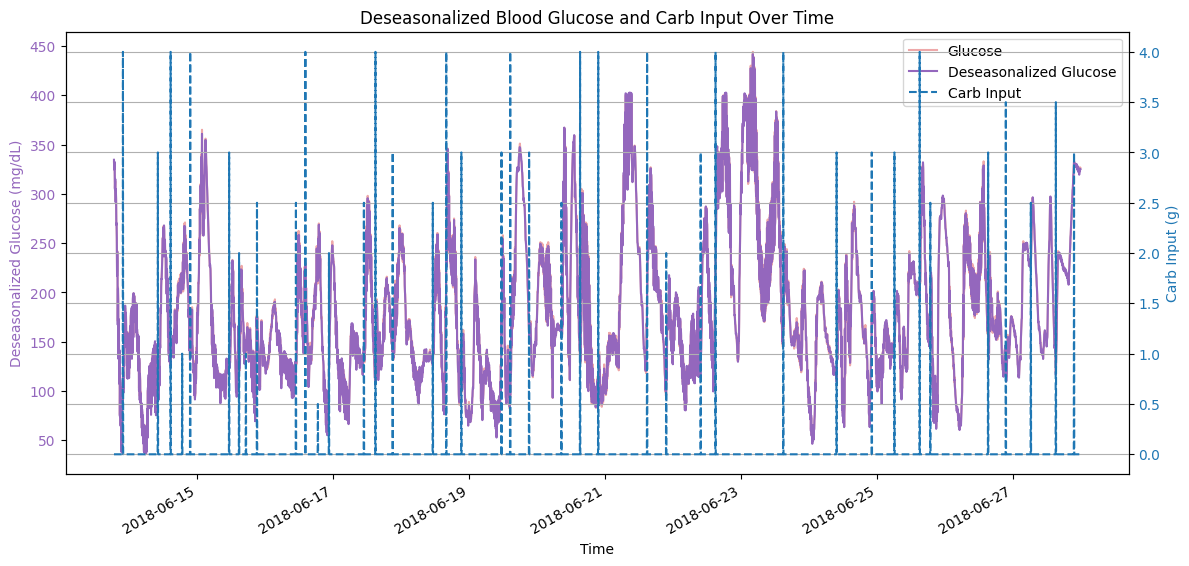

In [4]:
# Diabetes Analyzer
analyzer = DiabetesAnalyzer(df)

# Plot deseasonalized blood glucose and carb input over time (according to the data density of 24 records per day, we set the period is 24.
analyzer.deseasonalize_glucose_by_carb_input(period=24)

### Summary
1. From the chart of Seasonal Decomposition of Blood Glucose,
- Glucose: displays raw blood glucose data, clearly showing daily fluctuations (seasonality) and some potential changes in average blood glucose levels over several weeks (trends).
- Trend: shows the estimated trend component. It is a non-cyclical change in blood glucose. The wave is similar to Glucose's wave.
- Seasonality: The Y axis ranges from -2.5 to 2.5. This very small range with and clear periodic pattern. The "amplitude" of daily blood glucose fluctuations is considered to be relatively constant in absolute terms and is independent of basal blood glucose levels.
- Residual: The residuals are mostly centered around zero, and the additive model may not fully capture all variability.


2. From the chart of Deseasonalized Blood Glucose and Carb Input Over Time, we use additive seasonal decomposition, which removes blood glucose daily cyclical fluctuations. Presents a smoother blood glucose curve that mainly reflects the trend, which helps to more clearly visualize the relationship between blood glucose levels and carbohydrate intake without being disturbed by daily physiological rhythms.


## Conclusion
1. According to these line charts of blood glucose and carb input, when increased carb input will generally increase blood glucose readings. This is the Null Hypothesis.
2. Use additive seasonal decomposition to show that blood sugar levels are related to carbohydrate intake, but it is not related to the disruption of daily circadian rhythms.